In [1]:
#Dependencies

import matplotlib.pyplot as plt
import json
import random
import pandas as pd
from config import api_key
from citipy import citipy
import requests

In [2]:
#Generate list of random cities

cities = []

unique_cities_check = []

for i in range(10000):

    if len(cities) < 500:
        lat = random.uniform(-90.0,90.0)
        long = random.uniform(-180.0,180.0)
        
        city = citipy.nearest_city(lat,long)
        
        city_country = city.city_name + ' ' + city.country_code
        
        if city_country not in unique_cities_check:
            unique_cities_check.append(city_country)
            cities.append([city.city_name, city.country_code])
                    
    else:
        break



In [3]:
# Generate weather data based on the city and country data from OpenWeatherMap API

url = 'https://api.openweathermap.org/data/2.5/weather'


In [6]:
# Weather outputs
weather_data_list = []

for i in range(len(cities)):
    city = cities[i][0]
    country = cities[i][1]
        
    query_params={'q': city + ',' + country,
                  'units': 'imperial',
                  'appid': api_key}
    
    response = requests.get(url, params = query_params).json()

    # Try-except because not every city in CityPy is found in OWM,
    # about 13% attrition from the 1000 in the cities list
    try:
        weather_data_list.append({'City': city,
                                  'Country': country,
                                  'Longitude': response['coord']['lon'], 
                                  'Latitude': response['coord']['lat'],
                                  'Max Temperature': response['main']['temp_max'],
                                  'Humidity': response['main']['humidity'],
                                  'Cloud Cover': response['clouds']['all'],
                                  'Wind Speed': response['wind']['speed']
                                 })
        
    except:
        pass

In [7]:
# Convert to dataframe

cities_data = pd.DataFrame(weather_data_list)

cities_data = cities_data[['City',
                       'Country',
                       'Longitude',
                       'Latitude',
                       'Max Temperature',
                       'Humidity',
                       'Cloud Cover',
                       'Wind Speed']]

cities_data.head()

,City,Country,Longitude,Latitude,Max Temperature,Humidity,Cloud Cover,Wind Speed
0,zhigansk,ru,123.37,66.77,59.36,56,12,6.38
1,atuona,pf,-139.03,-9.80,81.23,97,48,21.25
2,busselton,au,115.35,-33.64,56.84,100,88,10.40
3,sibu,my,111.83,2.29,73.40,100,75,2.24
4,hasaki,jp,140.83,35.73,77.00,88,75,20.80


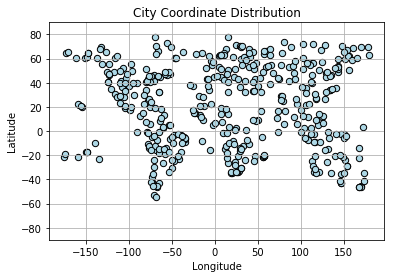

In [8]:
# World Map, City Coordinate Distribution

cities_data.plot.scatter('Longitude', 
                       'Latitude',
                       title='City Coordinate Distribution',
                       s=40,
                       ylim=[-90,90],
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True)

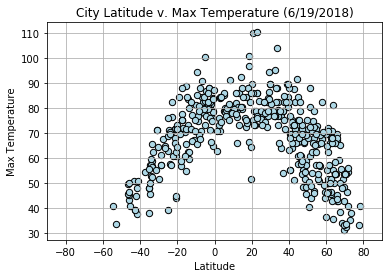

In [9]:
# Lat v. Temp

cities_data.plot.scatter('Latitude', 
                       'Max Temperature', 
                       title='City Latitude v. Max Temperature (6/19/2018)', 
                       marker='o', 
                       s=40,
                       xlim=[-90, 90],
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

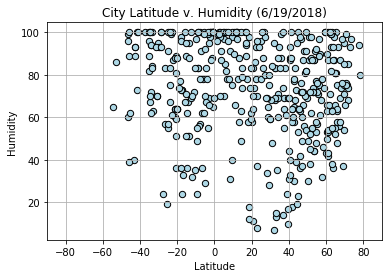

In [11]:
#Lat v. Humidity

cities_data.plot.scatter('Latitude', 
                       'Humidity', 
                       title='City Latitude v. Humidity (6/19/2018)', 
                       marker='o', 
                       s=40,
                       xlim=[-90, 90],                       
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

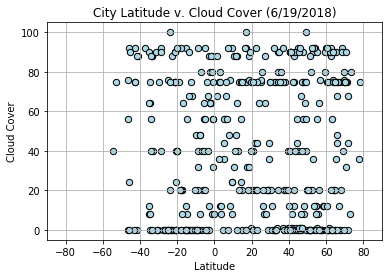

In [12]:
#Lat v. Clouds

cities_data.plot.scatter('Latitude', 
                       'Cloud Cover', 
                       title='City Latitude v. Cloud Cover (6/19/2018)', 
                       marker='o', 
                       s=40,
                       xlim=[-90, 90],
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)

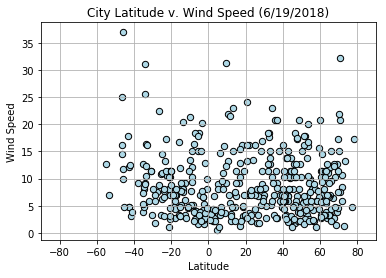

In [13]:
# Lat v. Wind

cities_data.plot.scatter('Latitude', 
                       'Wind Speed', 
                       title='City Latitude v. Wind Speed (6/19/2018)', 
                       marker='o', 
                       s=40,
                       xlim=[-90, 90],
                       color='LightBlue', 
                       edgecolor='black', 
                       grid=True)